In [18]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Set file path to csv and use file path to read CSV into a DataFrame and displaying a few rows
spy_csv = Path("CsvFiles/SPY1.csv")
vgt_csv= Path("CsvFiles/VGT1.csv")
# set file path to read CSV into a DataFrame
spy = pd.read_csv(spy_csv)
vgt = pd.read_csv(vgt_csv)

In [3]:
print(spy.head())
print(vgt.head())

       Date        Open        High         Low       Close   Adj Close  \
0  1/2/2018  267.839996  268.809998  267.399994  268.769989  251.651047   
1  1/3/2018  268.959991  270.640015  268.959991  270.470001  253.242798   
2  1/4/2018  271.200012  272.160004  270.540009  271.609985  254.310120   
3  1/5/2018  272.510010  273.559998  271.950012  273.420013  256.004944   
4  1/8/2018  273.309998  274.100006  272.980011  273.920013  256.473022   

     Volume  
0  86655700  
1  90070400  
2  80636400  
3  83524000  
4  57319200  
         Date        Open        High         Low       Close   Adj Close  \
0  2018-01-02  165.479996  167.000000  165.100006  166.979996  160.373138   
1  2018-01-03  167.309998  168.910004  167.300003  168.720001  162.044266   
2  2018-01-04  169.509995  170.160004  169.229996  169.690002  162.975861   
3  2018-01-05  170.570007  171.630005  170.229996  171.500000  164.714249   
4  2018-01-08  171.600006  172.500000  171.300003  172.320007  165.501801   

  

In [4]:
# Make a data frame containing VGT and XLF close price
close_df = pd.DataFrame()
close_df["Date"] = spy["Date"]
close_df["SPY"] = spy["Close"]
close_df["VGT"] = vgt["Close"]
close_df = close_df.set_index(pd.DatetimeIndex(close_df["Date"].values))
close_df.head()

Date         SPY         VGT
2018-01-02  1/2/2018  268.769989  166.979996
2018-01-03  1/3/2018  270.470001  168.720001
2018-01-04  1/4/2018  271.609985  169.690002
2018-01-05  1/5/2018  273.420013  171.500000
2018-01-08  1/8/2018  273.920013  172.320007

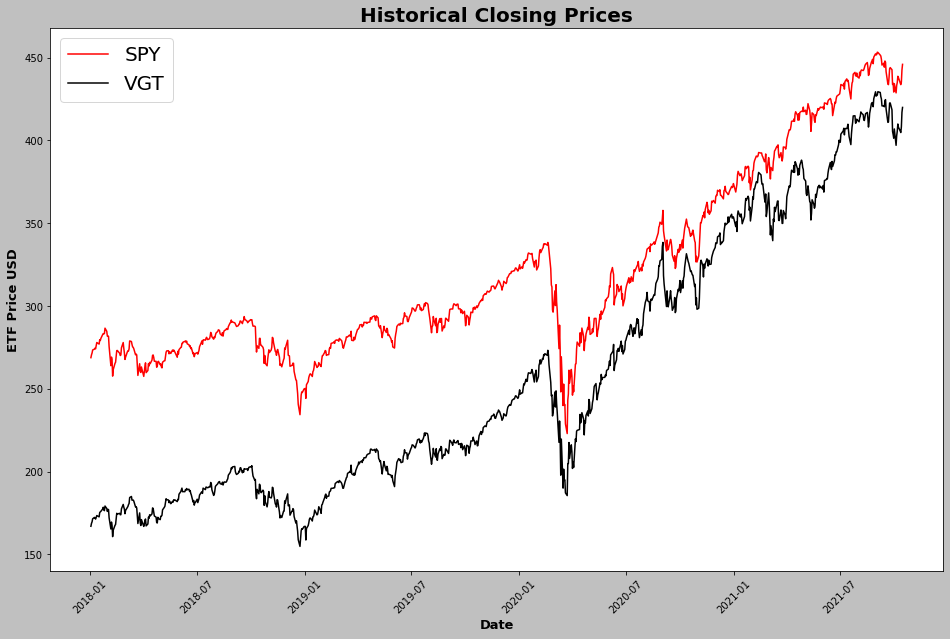

In [20]:
# Plot the data
plt.figure(figsize=(16,10),facecolor='silver')
plt.plot(close_df.index, close_df["SPY"], label="SPY", color="red")
plt.plot(close_df.index, close_df["VGT"], label="VGT",color="black")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("ETF Price USD",fontweight="bold",size=13)
plt.legend(prop={"size":20})
plt.title("Historical Closing Prices",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

In [6]:
# Plot the price difference between Spy and Vgt
price_diff_df = pd.DataFrame()
price_diff_df["Date"] = spy["Date"]
price_diff_df["SPY"] = spy["Close"]
price_diff_df["VGT"] = vgt["Close"]
price_diff_df["VGT-SPY Price Difference"] = vgt["Close"] - spy["Close"]
price_diff_df = price_diff_df.set_index(pd.DatetimeIndex(price_diff_df["Date"].values))
price_diff_df.head()

Date         SPY         VGT  VGT-SPY Price Difference
2018-01-02  1/2/2018  268.769989  166.979996               -101.789993
2018-01-03  1/3/2018  270.470001  168.720001               -101.750000
2018-01-04  1/4/2018  271.609985  169.690002               -101.919983
2018-01-05  1/5/2018  273.420013  171.500000               -101.920013
2018-01-08  1/8/2018  273.920013  172.320007               -101.600006

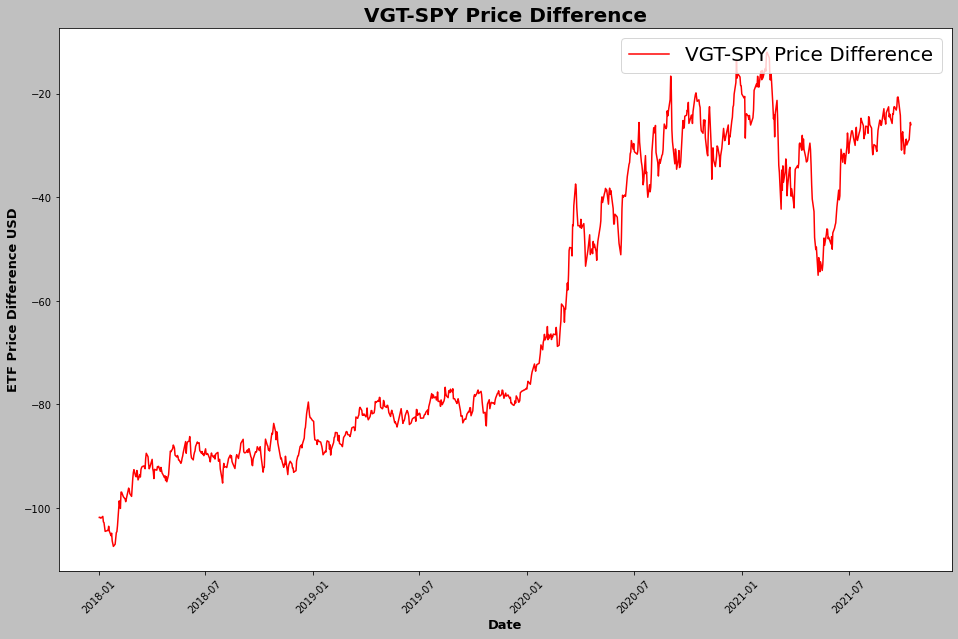

In [7]:
# Price Difference between Spy and Vgt. In 2018 there was a $90 difference in price. Around 2018 there was around a $90 price difference. In 2021 there is about a $30 difference.V
plt.figure(figsize=(16,10),facecolor='silver')
plt.plot(close_df.index, price_diff_df["VGT-SPY Price Difference"], label="VGT-SPY Price Difference", color="red")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("ETF Price Difference USD",fontweight="bold",size=13)
plt.legend(loc="upper right",prop={"size":20})
plt.title("VGT-SPY Price Difference",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

In [8]:
# Getting daily returns 
daily_returns = close_df[["VGT","SPY"]].pct_change(1)
daily_returns.tail()

VGT       SPY
2021-10-11 -0.005589 -0.007240
2021-10-12 -0.002367 -0.002462
2021-10-13  0.008401  0.003598
2021-10-14  0.021662  0.016821
2021-10-15  0.007028  0.007616

<AxesSubplot:>

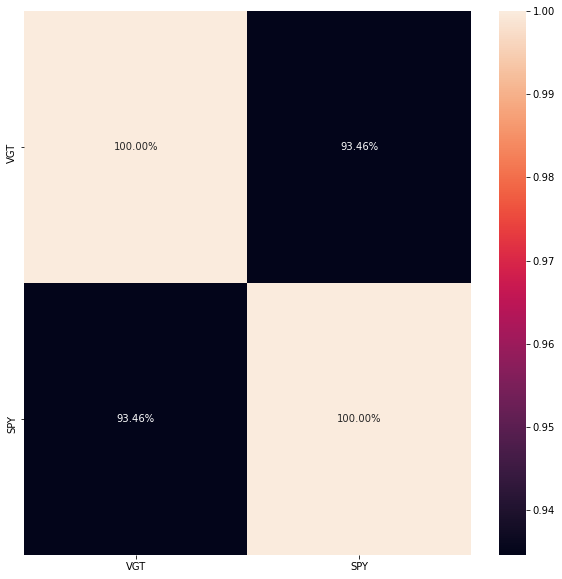

In [9]:
# Showing the correlation between both ETfs. Shows relationship between both etfs
plt.subplots(figsize=(10,10))
sns.heatmap(daily_returns.corr(), annot=True, fmt=".2%")
# SPY has a 93.64% correlation with VGT. Both ETFs seem to move similarly to each other. If one goes up the other one tends to follow. If one goes down the other one tends to follow.


In [10]:
# Showing the covariance. Covariance shows how stocks move together.
daily_returns.cov()

VGT       SPY
VGT  0.000285  0.000211
SPY  0.000211  0.000179

In [11]:
# Get the varience
daily_returns.var()

VGT    0.000285
SPY    0.000179
dtype: float64

In [12]:
# Getting the volitility. Shows us how risky these ETFs are. Volitilty is variance squared. # SPY has lower volitility than VGT. These both have low volitility. VGT is more riskier. 
daily_returns.std()*100


VGT    1.687006
SPY    1.337136
dtype: float64

In [13]:
# Show the average daily returns. We can expect SPY to give us around a .07 percent return based on the passed. We can expect VGT to give us around a .12 percent return based on the passed. VGT is more volitile but gives the more of a return compared to SPY
daily_returns.mean()*100

VGT    0.110991
SPY    0.062068
dtype: float64

In [14]:
# Annualized returns. SPY will gives us about a 18% annual return. VGT will give us a 30% return. 
# VGT gives about 12% more return compared to SPY but it is more volitile.
daily_returns.mean()*100*252

VGT    27.969669
SPY    15.641121
dtype: float64